In [ ]:
# Carga de contexto y librerias para el notebook :D
%load_ext kedro.ipython
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
df = catalog.load("PRI_FULL_BASE")   # lee el dataset del catálogo
list(df.columns)  

[10/25/25 02:01:47] INFO     Loading data from PRI_FULL_BASE (ParquetDataset)...               ]8;id=270257;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=989155;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\


[
    'TransactionID',
    'CustomerID',
    'CustLocation',
    'TransactionDate',
    'TransactionTime',
    'TransactionAmount (INR)',
    'txn_count',
    'total_spent',
    'avg_spent',
    'max_spent',
    'avg_balance',
    'first_txn_date',
    'last_txn_date',
    'recency_days',
    'tenure_days',
    'txn_per_day',
    'Recency',
    'Frequency',
    'Monetary',
    'RFM Score',
    'Segment_Final',
    'is_fraud',
    'DayOfWeek',
    'IsWeekend',
    'hour',
    'IsLateNight',
    'TimeOfDay',
    'AmountZScoreByLocation',
    'TimeSinceLastTxn',
    'TxnCountInLast24Hours',
    'RiskScore',
    'IsAnomaly'
]

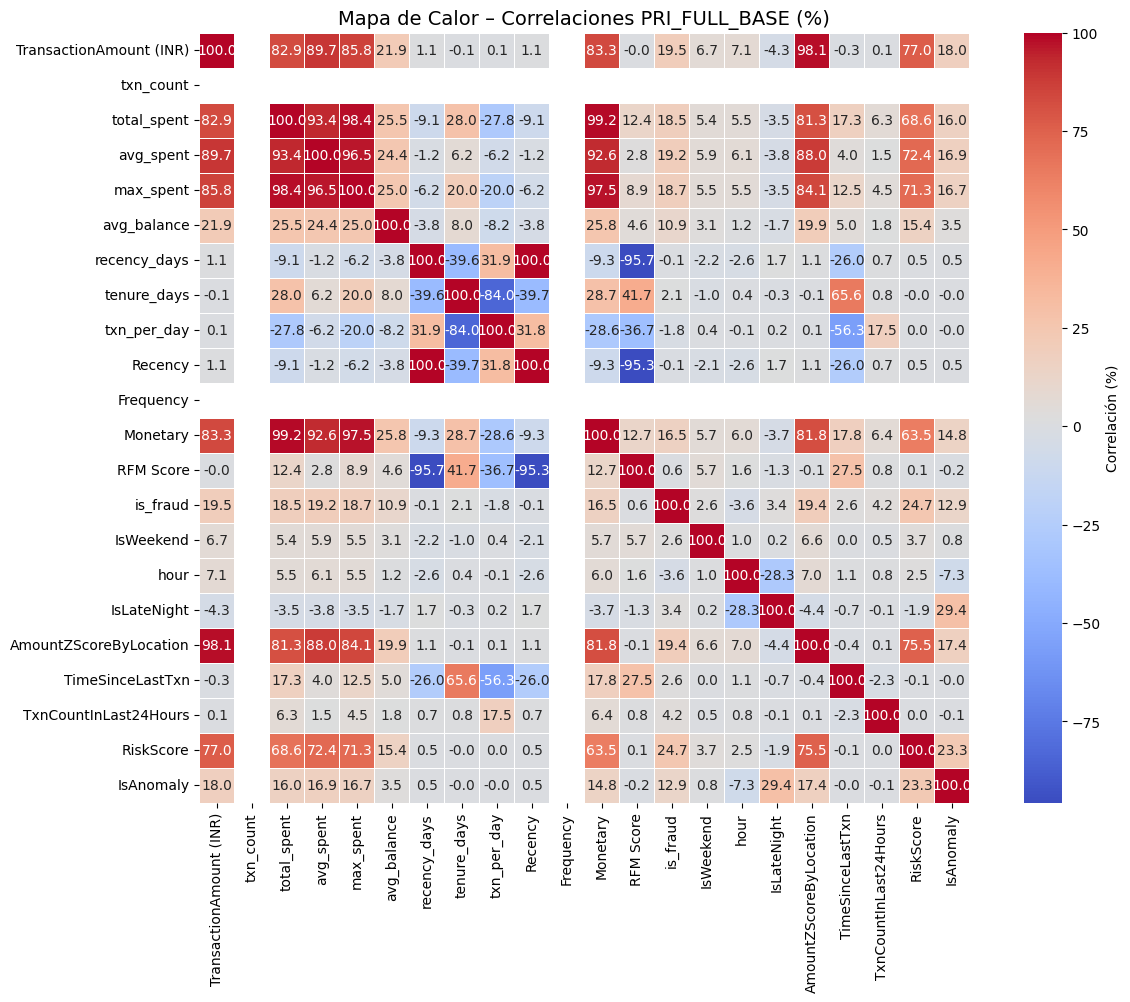

In [4]:
# =========================================================
# 2️⃣ Calcular correlaciones (solo variables numéricas)
# =========================================================
corr = df.select_dtypes(include=[np.number]).corr() * 100  # en porcentaje

# =========================================================
# 3️⃣ Graficar mapa de calor con valores en porcentaje
# =========================================================
plt.figure(figsize=(14,10))
sns.heatmap(
    corr,
    annot=True,             # muestra los valores
    fmt=".1f",              # formato: un decimal
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"label": "Correlación (%)"}
)
plt.title("Mapa de Calor – Correlaciones PRI_FULL_BASE (%)", fontsize=14)
plt.show()

In [13]:
# =========================================================
# 📊 Correlaciones numéricas completas – PRI_FULL_BASE
# =========================================================
import pandas as pd
import numpy as np

# Cargar dataset desde Kedro
df = catalog.load("PRI_FULL_BASE").copy()

# Filtrar solo columnas numéricas
num_cols = df.select_dtypes(include=[np.number]).columns
df_num = df[num_cols].copy()

# Calcular correlaciones
corr = df_num.corr() * 100  # porcentaje

# Redondear para legibilidad
corr = corr.round(2)

# Mostrar
print("=== Correlaciones entre variables numéricas (%): ===")
print(corr)


[10/25/25 02:04:25] INFO     Loading data from PRI_FULL_BASE (ParquetDataset)...               ]8;id=103864;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=711847;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

=== Correlaciones entre variables numéricas (%): ===
                         TransactionAmount (INR)  txn_count  total_spent  \
TransactionAmount (INR)                   100.00        NaN        82.87   
txn_count                                    NaN        NaN          NaN   
total_spent                                82.87        NaN       100.00   
avg_spent                                  89.68        NaN        93.40   
max_spent                                  85.76        NaN        98.44   
avg_balance                                21.93        NaN        25.54   
recency_days                                1.11        NaN        -9.14   
tenure_days                                -0.10        NaN        27.97   
txn_per_day                                 0.12        NaN       -27.84   
Recency                                     1.11        NaN        -9.12   
Frequency                                    NaN        NaN          NaN   
Monetary                           

# El gasto monetario de un cliente (Monetary) aumenta conforme se incrementa la atipicidad de los montos por ubicación (AmountZScoreByLocation), y disminuye a medida que aumenta el tiempo transcurrido desde la última transacción (TimeSinceLastTxn). Además, se espera que el comportamiento temporal (IsLateNight, IsWeekend) tenga un efecto moderado sobre el gasto promedio.

In [14]:
# =========================================================
# 📦 Crear DataFrame para la regresión final
# =========================================================
import pandas as pd

# Cargar dataset base desde el catálogo Kedro
df = catalog.load("PRI_FULL_BASE").copy()

# Variables seleccionadas según la hipótesis
selected_features = [
    "Monetary",
    "AmountZScoreByLocation",
    "TimeSinceLastTxn",
    "IsLateNight",
    "IsWeekend"
]

# Crear el nuevo DataFrame
df_reg = df[selected_features].copy()

# Mostrar resumen
print("Shape del DataFrame:", df_reg.shape)
print("Columnas:", df_reg.columns.tolist())
print("\nVista previa:")
print(df_reg.head())

[10/25/25 02:06:59] INFO     Loading data from PRI_FULL_BASE (ParquetDataset)...               ]8;id=525481;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=17513;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Shape del DataFrame: (984240, 5)
Columnas: ['Monetary', 'AmountZScoreByLocation', 'TimeSinceLastTxn', 'IsLateNight', 'IsWeekend']

Vista previa:
        Monetary  AmountZScoreByLocation  TimeSinceLastTxn  IsLateNight  \
162717    2618.0               -0.597657               0.0            1   
31303     2618.0                2.193792              48.0            0   
341511    1499.0                0.693326               0.0            0   
83580     1455.0                0.351537               0.0            0   
236449    1455.0               -0.758692               6.0            0   

        IsWeekend  
162717          0  
31303           0  
341511          1  
83580           0  
236449          1  


In [15]:
# =========================================================
# 📦 Crear DataFrame final para regresión
# =========================================================
import pandas as pd

# Cargar dataset base desde el catálogo Kedro
df = catalog.load("PRI_FULL_BASE").copy()

# Variables seleccionadas según la hipótesis de regresión
selected_features = [
    "Monetary",               # Variable dependiente (Y)
    "AmountZScoreByLocation", # Nivel de atipicidad del monto
    "TimeSinceLastTxn",       # Tiempo desde la última transacción
    "IsLateNight",            # Indicador de operación nocturna
    "IsWeekend"               # Indicador de fin de semana
]

# Crear nuevo DataFrame con las columnas elegidas
df_reg = df[selected_features].copy()

# Mostrar resumen
print("✅ DataFrame de regresión creado correctamente.")
print("Shape:", df_reg.shape)
print("Columnas:", df_reg.columns.tolist())
print("\nVista previa:")
print(df_reg.head())


[10/25/25 02:10:26] INFO     Loading data from PRI_FULL_BASE (ParquetDataset)...               ]8;id=402827;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=592832;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

✅ DataFrame de regresión creado correctamente.
Shape: (984240, 5)
Columnas: ['Monetary', 'AmountZScoreByLocation', 'TimeSinceLastTxn', 'IsLateNight', 'IsWeekend']

Vista previa:
        Monetary  AmountZScoreByLocation  TimeSinceLastTxn  IsLateNight  \
162717    2618.0               -0.597657               0.0            1   
31303     2618.0                2.193792              48.0            0   
341511    1499.0                0.693326               0.0            0   
83580     1455.0                0.351537               0.0            0   
236449    1455.0               -0.758692               6.0            0   

        IsWeekend  
162717          0  
31303           0  
341511          1  
83580           0  
236449          1  


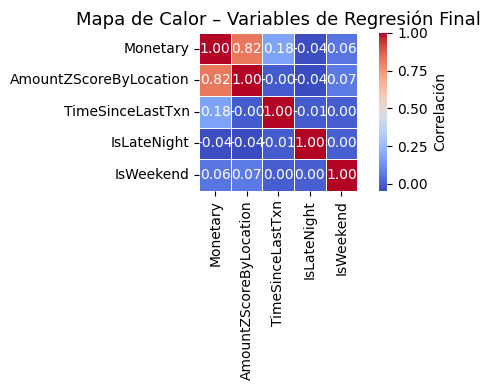

In [16]:
# =========================================================
# 🔥 Mapa de Calor – Variables de Regresión Final
# =========================================================
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcular correlación solo entre variables numéricas
corr = df_reg.corr()

# Graficar mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr,
    annot=True,           # mostrar valores
    fmt=".2f",            # formato numérico
    cmap="coolwarm",      # paleta de colores
    linewidths=0.5,
    square=True,
    cbar_kws={"label": "Correlación"}
)
plt.title("Mapa de Calor – Variables de Regresión Final", fontsize=13)
plt.tight_layout()
plt.show()


# El gasto total de un cliente (Monetary) se ve influido por su comportamiento transaccional, especialmente por cuán atípicos son los montos que realiza (AmountZScoreByLocation), el tiempo desde su última transacción (TimeSinceLastTxn), y el momento en que opera (IsLateNight, IsWeekend).

In [17]:
# =========================================================
# 📊 Análisis descriptivo de las variables seleccionadas
# =========================================================
import pandas as pd
import numpy as np

# Resumen estadístico clásico
desc = df_reg.describe().T

# Agregar estadísticas adicionales
desc["mean"] = df_reg.mean()
desc["median"] = df_reg.median()
desc["skew"] = df_reg.skew()       # Asimetría
desc["kurtosis"] = df_reg.kurt()   # Curtosis (forma de la distribución)

# Reordenar columnas
desc = desc[["mean", "median", "std", "min", "25%", "50%", "75%", "max", "skew", "kurtosis"]]

# Mostrar resultados
pd.set_option("display.float_format", "{:.3f}".format)
print("=== Estadísticas descriptivas de las variables seleccionadas ===")
display(desc)

=== Estadísticas descriptivas de las variables seleccionadas ===


,mean,median,std,min,25%,50%,75%,max,skew,kurtosis
Monetary,985.000,605.000,919.768,0.000,210.000,605.000,1653.000,2618.000,0.763,-0.913
AmountZScoreByLocation,-0.000,-0.423,0.998,-3.352,-0.732,-0.423,0.419,6.593,1.179,0.184
TimeSinceLastTxn,2.395,0.000,7.437,0.000,0.000,0.000,0.000,81.000,3.751,15.480
IsLateNight,0.075,0.000,0.263,0.000,0.000,0.000,0.000,1.000,3.226,8.409
IsWeekend,0.308,0.000,0.462,0.000,0.000,0.000,1.000,1.000,0.831,-1.309


# SinceLastTxn Muy sesgada (skew = 3.75, curtosis 15.48): la mayoría de los clientes transa con frecuencia corta (casi 0 días), pero hay pocos que llevan semanas sin operar. Podría transformarse con log(1 + x) si el modelo lo exige. (PODRIA CORREGIRSE POR EL MOMENTO LO DEJARÉ ASÍ 

In [3]:
df = catalog.load("Features_training_v1")   # lee el dataset del catálogo
list(df.columns)  

[10/25/25 02:22:52] INFO     Loading data from Features_training_v1 (ParquetDataset)...        ]8;id=955341;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=671849;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

['AmountZScoreByLocation', 'IsAnomaly', 'IsLateNight', 'IsWeekend', 'is_fraud']